In [153]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt



# 直方图


<Figure size 432x288 with 0 Axes>

(array([1.000e+00, 6.000e+00, 2.000e+01, 2.900e+01, 5.900e+01, 9.700e+01,
        1.370e+02, 0.000e+00, 1.810e+02, 2.200e+02, 3.010e+02, 4.210e+02,
        5.000e+02, 6.120e+02, 0.000e+00, 7.600e+02, 9.400e+02, 1.062e+03,
        1.254e+03, 1.443e+03, 1.646e+03, 0.000e+00, 1.761e+03, 1.882e+03,
        1.998e+03, 2.092e+03, 2.020e+03, 2.105e+03, 0.000e+00, 2.086e+03,
        2.029e+03, 1.979e+03, 1.808e+03, 1.731e+03, 1.668e+03, 0.000e+00,
        1.578e+03, 1.469e+03, 1.278e+03, 1.236e+03, 1.220e+03, 1.003e+03,
        0.000e+00, 9.300e+02, 9.760e+02, 8.800e+02, 8.900e+02, 7.910e+02,
        7.970e+02, 0.000e+00, 7.710e+02, 7.800e+02, 8.520e+02, 8.190e+02,
        8.320e+02, 7.850e+02, 0.000e+00, 8.790e+02, 9.090e+02, 8.680e+02,
        8.540e+02, 9.470e+02, 9.730e+02, 0.000e+00, 9.050e+02, 9.130e+02,
        8.670e+02, 9.350e+02, 9.320e+02, 9.670e+02, 1.008e+03, 0.000e+00,
        1.016e+03, 1.063e+03, 1.134e+03, 1.120e+03, 1.190e+03, 1.218e+03,
        0.000e+00, 1.325e+03, 1.399e+0

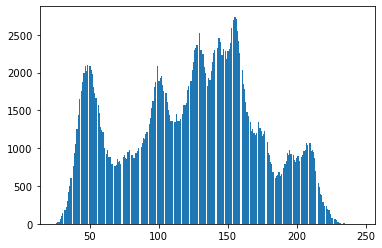

In [154]:
img = cv2.imread('lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('lenna_gray', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure()
plt.hist(gray.ravel(), 256)
plt.show()  
# lenna这个图的分布比较均匀， 

In [8]:
x = np.arange(12).reshape(3,4)
x
x.ravel()  # 变成1维度

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# 灰度图像的直方图, 方法二

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Grayscale Histogram')

Text(0.5, 0, 'BIns')

Text(0, 0.5, '# of Pixels')

(0.0, 256.0)

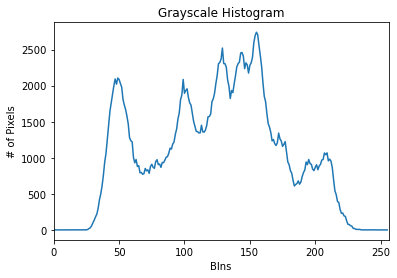

In [155]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])  # 每个数值对应的点的个数
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('BIns')
plt.ylabel('# of Pixels')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# 彩色图

In [24]:
a = (1,2,3)
b = ['c', 'd', 'e']
for (i, j) in zip(a,b):
    print(i,j)

1 c
2 d
3 e


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Flattened Coloe Histogram')

Text(0.5, 0, 'Bins')

Text(0, 0.5, '# of Pixels')

(0.0, 256.0)

(0.0, 256.0)

(0.0, 256.0)

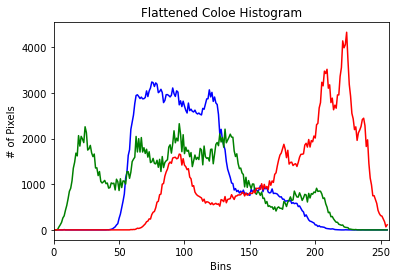

In [25]:
image = cv2.imread('lenna.png')
cv2.imshow('Original', image)
# cv2.waitKey(0)

chans = cv2.split(image)
# type(chans)   # list 
# len(chans)    # 3  每一个元素表示一个通道
colors = ("b", "g", "r")
plt.figure()
plt.title('Flattened Color Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

# 直方图的均衡化

1. 依次扫描原始灰度图像的每一个像素，计算出图像的灰度直方图H
2. 计算灰度直方图的累加直方图
3. 根据累加直方图和直方图均衡化原理得到输入与输出之间的映射关系。
4. 最后根据映射关系得到结果：dst(x,y) = H'(src(x,y))进行图像变换

In [156]:

def hist_equlization(img, p):
    """
    img:原始图像
    p: 直方图大小，一般等于灰度级数
    q: 均衡化后直方图大小，
    """
    h, w = img.shape
    new_img = np.zeros([h, w], img.dtype)
    sumPi = 0
    equliz_hist = np.zeros(p)  # 初始化
    img_hist = cv2.calcHist([img], [0], None, [p], [0, p]).ravel()
    img_hist = img_hist / float(h * w)
    for i in range(p):
        sumPi += img_hist[i]
        qi = int(round(sumPi * 256 - 1))
        if qi < 0:
            qi = 0
        if qi > 256:
            qi = 255     
        equliz_hist[i] = qi
    equliz_hist.astype(np.int64)
    for i in range(h):
        for j in range(w):
            new_img[i,j] = equliz_hist[img[i,j]]
            
    return equliz_hist, new_img
        
    
    
img = np.array([[1,3,9,9,8],
       [2,1,3,7,3],
       [3,6,0,6,4],
       [6,8,2,0,5],
       [2,9,2,6,0]], img.dtype)
equliz_hist, new_img = hist_equlization(img, p=10)
equliz_hist, new_img

(array([ 30.,  50.,  91., 132., 142., 153., 194., 204., 224., 255.]),
 array([[ 50, 132, 255, 255, 224],
        [ 91,  50, 132, 204, 132],
        [132, 194,  30, 194, 142],
        [194, 224,  91,  30, 153],
        [ 91, 255,  91, 194,  30]], dtype=uint8))

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Grayscale Histogram')

Text(0.5, 0, 'BIns')

Text(0, 0.5, '# of Pixels')

(0.0, 256.0)

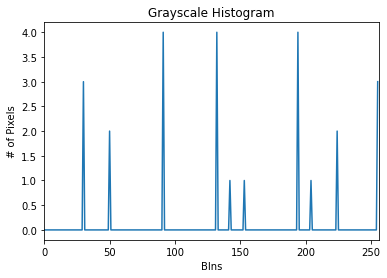

In [157]:
hist = cv2.calcHist([new_img], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('BIns')
plt.ylabel('# of Pixels')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Grayscale Histogram')

Text(0.5, 0, 'BIns')

Text(0, 0.5, '# of Pixels')

(0.0, 256.0)

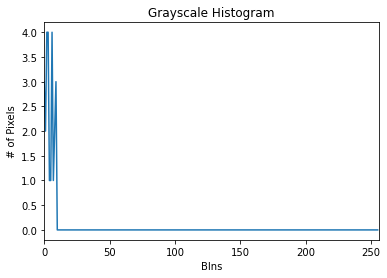

In [158]:
img = np.array([[1,3,9,9,8],
       [2,1,3,7,3],
       [3,6,0,6,4],
       [6,8,2,0,5],
       [2,9,2,6,0]], dtype='uint8')
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('BIns')
plt.ylabel('# of Pixels')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

<Figure size 432x288 with 0 Axes>

(array([ 349., 1123.,  500., 1372.,  940., 1062., 1254.,    0., 1443.,
        1646.,    0., 1761.,    0., 1882.,    0., 1998.,    0., 2092.,
           0., 2020.,    0., 2105.,    0., 2086.,    0., 2029.,    0.,
        1979.,    0., 1808., 1731.,    0., 1668., 1578.,    0., 1469.,
        1278., 1236.,    0., 1220., 1933.,  976.,  880.,  890.,  791.,
        1568.,  780.,  852.,  819., 1617.,  879.,  909.,  868.,  854.,
         947.,  973., 1818.,  867.,  935.,  932.,  967., 1008., 1016.,
        1063., 1134., 1120., 1190.,    0., 1218., 1325., 1399.,    0.,
        1538., 1621.,    0., 1806.,    0., 1871.,    0., 2086.,    0.,
        1894.,    0., 1933., 1956.,    0., 1836.,    0., 1761.,    0.,
        1729., 1612.,    0., 1504., 1435., 1366.,    0., 1362., 1344.,
        1345.,    0., 1451., 1359., 1355.,    0., 1384., 1448.,    0.,
        1568., 1572.,    0., 1604.,    0., 1776., 1817.,    0., 1894.,
           0., 2029.,    0., 2140.,    0., 2304.,    0.,    0., 2321.,
      

(array([1.000e+00, 6.000e+00, 2.000e+01, 2.900e+01, 5.900e+01, 9.700e+01,
        1.370e+02, 0.000e+00, 1.810e+02, 2.200e+02, 3.010e+02, 4.210e+02,
        5.000e+02, 6.120e+02, 0.000e+00, 7.600e+02, 9.400e+02, 1.062e+03,
        1.254e+03, 1.443e+03, 1.646e+03, 0.000e+00, 1.761e+03, 1.882e+03,
        1.998e+03, 2.092e+03, 2.020e+03, 2.105e+03, 0.000e+00, 2.086e+03,
        2.029e+03, 1.979e+03, 1.808e+03, 1.731e+03, 1.668e+03, 0.000e+00,
        1.578e+03, 1.469e+03, 1.278e+03, 1.236e+03, 1.220e+03, 1.003e+03,
        0.000e+00, 9.300e+02, 9.760e+02, 8.800e+02, 8.900e+02, 7.910e+02,
        7.970e+02, 0.000e+00, 7.710e+02, 7.800e+02, 8.520e+02, 8.190e+02,
        8.320e+02, 7.850e+02, 0.000e+00, 8.790e+02, 9.090e+02, 8.680e+02,
        8.540e+02, 9.470e+02, 9.730e+02, 0.000e+00, 9.050e+02, 9.130e+02,
        8.670e+02, 9.350e+02, 9.320e+02, 9.670e+02, 1.008e+03, 0.000e+00,
        1.016e+03, 1.063e+03, 1.134e+03, 1.120e+03, 1.190e+03, 1.218e+03,
        0.000e+00, 1.325e+03, 1.399e+0

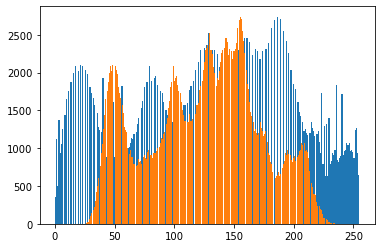

In [161]:
img_lenna = cv2.imread('lenna.png', 1)
gray = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY)
# cv2.equlizeHist(gray)
dst = cv2.equalizeHist(gray)

# 比较原图的hist与均衡化之后的结果

plt.figure()
plt.hist(dst.ravel(), 256)
plt.hist(gray.ravel(), 256)
plt.show()

In [ ]:
img = cv2.imread('lenna.png', 1)
# cv2.imshow('lenna', img)

(b ,g,r) = cv2.split(img)
bH = cv2.equalizeHist([b])
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并为一个通道

result = cv2.merge((bH, gH, rH))
cv.imshow('dst_rgb',result)
cv2.waitKey(0)


array([[ 23, 116, 255, 255, 220],
       [ 70,  23, 116, 197, 116],
       [116, 185,   0, 185, 128],
       [185, 220,  70,   0, 139],
       [ 70, 255,  70, 185,   0]], dtype=uint8)

In [137]:
img = cv2.imread("lenna.png")
h,w = img.shape[:2] 
img.dtype

dtype('uint8')

In [ ]:
tf.nn.conv2d (input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)